In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Final_feature_with_price.csv to Final_feature_with_price.csv
User uploaded file "Final_feature_with_price.csv" with length 2429546 bytes


In [0]:
def filter1(time):
    a, b = time.split(' ')
    year, month, day = a.split('-')
    hour,minute,second = b.split(':')
    return datetime(int(year),int(month),int(day),int(hour),int(minute),int(second))


In [0]:

import pandas as pd
from datetime import datetime
import numpy as np

features = pd.read_csv('Final_feature_with_price.csv')
labels = pd.read_csv('final_label.csv')
features['time'] = features['time'].apply(lambda x: filter1(x) )

In [25]:
features.columns

Index(['Unnamed: 0', 'time', 'vader_pos', 'vader_neu', 'vader_neg',
       'vader_compound', 'socialsent_compound', 'socialsent_neu',
       'socialsent_pos', 'socialsent_neg', 'vader_votes_compound',
       'vader_votes_neu', 'vader_votes_neg', 'vader_votes_pos',
       'socialsent_votes_compound', 'socialsent_votes_neu',
       'socialsent_votes_neg', 'socialsent_votes_pos', 'vader_child_compound',
       'vader_child_neu', 'vader_child_neg', 'vader_child_pos',
       'socialsent_child_compound', 'socialsent_child_neu',
       'socialsent_child_neg', 'socialsent_child_pos', 'None',
       'Long-term Holder', 'Bitcoin Skeptic', 'Bearish', 'Bullish',
       'num_comments', 'num_child', 'num_word', 'close', 'change',
       'last_close'],
      dtype='object')

In [0]:
label = []
for i in range(labels.shape[0]):
    x, y = labels['time'].iloc[i].split(' ')
    a,b,c = x.split('-')
    d,e,f = y.split(':')
    label += [datetime(int(a),int(b),int(c),int(d),int(e),int(f))]
labels['time'] = pd.DataFrame(label)
labels['label'] = labels['label'].apply(lambda x: int(x) if x != 'nolabel' else x)

In [0]:
def drop_nan(data):
  size = []
  for i in range(data.shape[0]):
    try:
      int(data['label'].iloc[i])# == 'Nan':
    except: 
      size += [i]
  data = data.drop(data.index[size])
  data = data.reset_index()
  data = data.drop(['index'],axis = 1)
  
  return data
labels = drop_nan(labels)

# 1: Big Rise, 2:Small Rise, 3.Big Drop, 4.Small Drop

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


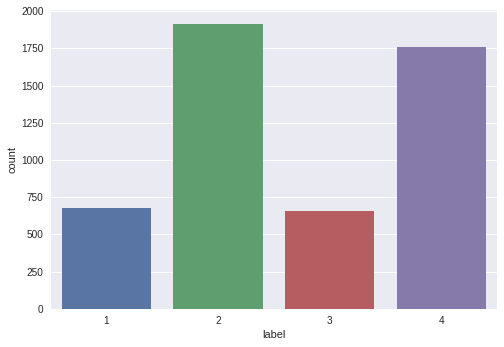

In [28]:
data = pd.merge(features, labels[['time','label']], how='inner', on='time')
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=data)

In [29]:
"""
def feature_correlation(data):
    correlation = data.corr()
    #print(correlation)
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    

data[data.columns.difference(['Unnamed: 0','time','label'])].describe()

feature_correlation(data[data.columns.difference(['time','label'])])
"""

'\ndef feature_correlation(data):\n    correlation = data.corr()\n    #print(correlation)\n    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")\n    \n\ndata[data.columns.difference([\'Unnamed: 0\',\'time\',\'label\'])].describe()\n\nfeature_correlation(data[data.columns.difference([\'time\',\'label\'])])\n'

In [0]:
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.feature_selection import SelectFromModel
#from sklearn.multiclass import OneVsOneClassifier
#X = data[data.columns.difference(['Unnamed: 0','time','label'])].values
#y = data[['label']].values
#clf = ExtraTreesClassifier()
#clf = clf.fit(X, list(y[:,0]))
#model = SelectFromModel(clf, prefit=True)
#features= model.transform(X)
#features.shape

In [0]:
def decode(y):
  s = []
  for i in range(len(y)):
    index = np.argmax(y[i])
    s.append(index+1)
  return np.array(s)

def one_hot_encoding(data, typed='df'):
    if typed == 'df':
      size = []
      for i in range(data.shape[0]):
          tem = [0 for i in range(4)]

          tem[int(data['label'].iloc[i])-1] = 1

          size.append(tem)
    else:
      size = []
      for i in range(data.shape[0]):
          tem = [0 for i in range(4)]

          tem[int(data[i])-1] = 1

          size.append(tem)
    return np.array(size)
label = one_hot_encoding(data)
#features = data[data.columns.difference(['time'])]
#features = np.array(features)


In [32]:
! pip install imblearn

In [0]:
import numpy as np
from imblearn.over_sampling import SMOTE 

def get_data(windowsize,features,label):
  a = []
  for i in range(windowsize, len(features)):
      temp = []
      for j in range(windowsize):
        temp += [np.array([features[i-j-1]])]

      a += [temp]
  a = np.array(a)
  features = a
  label = label[windowsize::]
  assert(label.shape[0] == features.shape[0])
  features = features.reshape((features.shape[0], features.shape[1], features.shape[3]))
  dim1 = features.shape[0]
  dim2 = features.shape[1]
  dim3 = features.shape[2]
  
  def balanced_data(features,label):
    sm = SMOTE(random_state=42)
    features, label = sm.fit_sample(features, decode(label))
    print(features.shape)
    features = features.reshape((features.shape[0],dim2,dim3))
    label = one_hot_encoding(label,typed='nodf')
    return features,label
  
  features = features.reshape((dim1,dim2*dim3))
  features,label = balanced_data(features,label)
  
  return features, label


In [0]:
Base = ['vader_pos', 'vader_neu', 'vader_neg', 'vader_compound','socialsent_compound', 'socialsent_neu', 'socialsent_pos', 'socialsent_neg','num_comments', 'num_word','None', 'Long-term Holder', 'Bitcoin Skeptic', 'Bearish', 'Bullish']
children = []



In [0]:
features0 = data[['vader_pos', 'vader_neu', 'vader_neg',
       'vader_compound', 'socialsent_compound', 'socialsent_neu',
       'socialsent_pos', 'socialsent_neg', 'None', 'Long-term Holder',
       'Bitcoin Skeptic', 'Bearish', 'Bullish', 'num_comments', 'num_child',
       'num_word','change']].values
features1 = data[['vader_pos', 'vader_neu', 'vader_neg', 'vader_compound']].values 
features2 = data[['socialsent_compound', 'socialsent_neu', 'socialsent_pos', 'socialsent_neg']].values 
features3 = data[['None', 'Long-term Holder', 'Bitcoin Skeptic', 'Bearish', 'Bullish']].values 
features4 = data[['num_comments', 'num_word' ]].values 

features5 = data[['change' ]].values 
features6 = data[['vader_pos', 'vader_neu', 'vader_neg', 'vader_compound','socialsent_compound', 'socialsent_neu', 'socialsent_pos', 'socialsent_neg']].values

In [0]:
features = features6

In [0]:
Base = ['vader_pos', 'vader_neu', 'vader_neg',
       'vader_compound', 'socialsent_compound', 'socialsent_neu',
       'socialsent_pos', 'socialsent_neg','None', 'Long-term Holder', 'Bitcoin Skeptic', 'Bearish', 'Bullish','num_comments', 'num_word','num_child']
price = ['change'] 
votes = ['vader_votes_compound',
       'vader_votes_neu', 'vader_votes_neg', 'vader_votes_pos',
       'socialsent_votes_compound', 'socialsent_votes_neu',
       'socialsent_votes_neg', 'socialsent_votes_pos'] 
children = ['vader_child_compound',
       'vader_child_neu', 'vader_child_neg', 'vader_child_pos',
       'socialsent_child_compound', 'socialsent_child_neu',
       'socialsent_child_neg', 'socialsent_child_pos'] 

In [0]:
#data[Base].values
#data[Base+price].values
#data[Base+votes].values
#data[Base+children].values
#data[Base+price+votes].values
#data[Base+price+votes+children].values
features = data[Base+price+votes+children].values


In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_score,recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
def ensemble(y_val_hat1,y_valid1,y_val_hat2,y_valid2,y_test_hat1,y_test1,y_test_hat2,y_test2,classifier = 'LogR'):
  #Input should be decoded labels
    a = decode(y_val_hat1)
    a = a.reshape((a.shape[0],1))
    b = decode(y_val_hat2)
    b = b.reshape((b.shape[0],1))
    Feature_train = np.concatenate((a, b), axis=1)
    Label_train = decode(y_valid1)
    c = decode(y_test_hat1)
    c = c.reshape((c.shape[0],1))
    d = decode(y_test_hat2)
    d = d.reshape((d.shape[0],1))
    Feature_test = np.concatenate((c, d), axis=1)
    Label_test = decode(y_test1)
    if classifier == 'SVC':
      y_hat_test = OneVsRestClassifier(SVC(random_state=1)).fit(Feature_train, Label_train).predict(Feature_test)    
    if classifier == 'LogR':
      y_hat_test = OneVsRestClassifier(LogisticRegression(random_state=1)).fit(Feature_train, Label_train).predict(Feature_test) 
    if classifier == 'DecT':
      y_hat_test = OneVsRestClassifier(DecisionTreeClassifier(random_state=1)).fit(Feature_train, Label_train).predict(Feature_test) 
    if classifier == 'GBDT':
      y_hat_test = OneVsRestClassifier(GradientBoostingClassifier(max_depth=30,random_state=1)).fit(Feature_train, Label_train).predict(Feature_test) 
    if classifier == 'RDF':
      y_hat_test = OneVsRestClassifier(RandomForestClassifier(n_estimators=30,max_depth=30,random_state=1)).fit(Feature_train, Label_train).predict(Feature_test) 
   
    print("Ensemble accuracy:",accuracy_score(Label_test,y_hat_test))
    
    fpr, tpr, thresholds = metrics.roc_curve(Label_test, y_hat_test, pos_label=2)
    f1_score_macro = metrics.f1_score(Label_test, y_hat_test, average='macro') 
    f1_score_micro = metrics.f1_score(Label_test, y_hat_test, average='micro') 
    auc = metrics.auc(fpr, tpr)
    c_m = confusion_matrix(Label_test, y_hat_test,labels = [1,2,3,4])
    precision_micro = metrics.precision_score(Label_test, y_hat_test,average='micro' )
    precision_macro = metrics.precision_score(Label_test, y_hat_test,average='macro' )
    recall_macro = metrics.recall_score(Label_test, y_hat_test,average='macro' )
    recall_micro = metrics.recall_score(Label_test, y_hat_test,average='micro' )
    return f1_score_macro,f1_score_micro,auc,precision_micro,precision_macro,recall_macro,recall_micro,c_m

In [0]:
temp = []
dec_ = decode(label)
for i in range(dec_.shape[0]):
  if dec_[i] != 4:
    temp += [dec_[i]]
  else:
    temp += [2]
label = one_hot_encoding(np.array(temp),typed = 'list')
del dec_

In [77]:
from keras.models import Sequential
from keras.layers import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def model(features,label,window):
  
    features, label = get_data(window,features,label)
        
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
    #indices = int(0.8 * X_train.shape[0])
    #X_train, y_train, X_valid, y_valid = X_train[0:indices], y_train[0:indices], X_train[indices::], y_train[indices::]
    
    model = Sequential()
    
    model.add(LSTM(128, input_shape = (features.shape[1],features.shape[2]),
                   return_sequences=False,dropout=0.2, recurrent_dropout=0.2 ))
    
    model.add(Dense(24))
    model.add(Dropout(0.4))
    #model.add(Activation('linear'))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, epochs=2000, batch_size=64,validation_data=(X_test, y_test))
    y_test_hat = model.predict(X_test, verbose = 0)
    c_m = confusion_matrix(decode(y_test),decode(y_test_hat),labels = [1,2,3,4])
    fpr, tpr, thresholds = metrics.roc_curve(decode(y_test), decode(y_test_hat), pos_label=2)
    f1_score_macro = metrics.f1_score(decode(y_test), decode(y_test_hat), average='macro') 
    f1_score_micro = metrics.f1_score(decode(y_test), decode(y_test_hat), average='micro') 
    auc = metrics.auc(fpr, tpr)
    from sklearn.metrics import precision_score,recall_score
    precision_micro = metrics.precision_score(decode(y_test),decode(y_test_hat),average='micro' )
    precision_macro = metrics.precision_score(decode(y_test),decode(y_test_hat),average='macro' )
    recall_macro = metrics.recall_score(decode(y_test),decode(y_test_hat),average='macro' )
    recall_micro = metrics.recall_score(decode(y_test),decode(y_test_hat),average='micro' )
    
    return f1_score_macro,f1_score_micro,auc,precision_micro,precision_macro,recall_macro,recall_micro, history,c_m

def model2(features,label,window):
  
    features, label = get_data(window,features,label)
        
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
    indices = int(0.8 * X_train.shape[0])
    X_train, y_train, X_valid, y_valid = X_train[0:indices], y_train[0:indices], X_train[indices::], y_train[indices::]
    
    model = Sequential()
    
    model.add(LSTM(128, input_shape = (features.shape[1],features.shape[2]),
                   return_sequences=False,dropout=0.2, recurrent_dropout=0.2 ))
    
    model.add(Dense(24))
    #model.add(Activation('linear'))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, epochs=20, batch_size=64,validation_data=(X_valid, y_valid))
    y_val_hat = model.predict(X_valid, verbose = 0)
    y_test_hat = model.predict(X_test, verbose = 0)
    
    c_m = confusion_matrix(decode(y_test),decode(y_test_hat),labels = [1,2,3,4])
    fpr, tpr, thresholds = metrics.roc_curve(decode(y_test), decode(y_test_hat), pos_label=1)
    f1_score_macro = metrics.f1_score(decode(y_test), decode(y_test_hat), average='macro') 
    f1_score_micro = metrics.f1_score(decode(y_test), decode(y_test_hat), average='micro') 
    auc = metrics.auc(fpr, tpr)
    from sklearn.metrics import precision_score,recall_score
    precision_micro = metrics.precision_score(decode(y_test),decode(y_test_hat),average='micro' )
    precision_macro = metrics.precision_score(decode(y_test),decode(y_test_hat),average='macro' )
    recall_macro = metrics.recall_score(decode(y_test),decode(y_test_hat),average='macro' )
    recall_micro = metrics.recall_score(decode(y_test),decode(y_test_hat),average='micro' )
    a = {'auc': auc, 'precision_micro':precision_micro,'precision_macro':precision_macro,'recall_macro':recall_macro,'recall_micro':recall_micro,
              'f1_score_macro':f1_score_macro, 'f1_score_micro':f1_score_micro}
    print("for window size 10:", a)
    print("Confusion Matrix is:\n",c_m)
    return y_val_hat,y_valid, y_test_hat,y_test    


    
    
result = {} 
features1 = data[Base+votes+children].values
features2 = data[price].values

for i in {10}:
  y_val_hat1,y_valid1, y_test_hat1,y_test1 = model2(features1, label, i)
  y_val_hat2,y_valid2, y_test_hat2,y_test2 = model2(features2, label, i)
  f1_score_macro,f1_score_micro,auc,precision_micro,precision_macro,recall_macro,recall_micro,c_m = ensemble(y_val_hat1,y_valid1,y_val_hat2,y_valid2,y_test_hat1,y_test1,y_test_hat2,y_test2)
  result[i] = {'auc': auc, 'precision_micro':precision_micro,'precision_macro':precision_macro,'recall_macro':recall_macro,'recall_micro':recall_micro,
              'f1_score_macro':f1_score_macro, 'f1_score_micro':f1_score_micro}
  print("for window size {}:".format(i), result[i])
  print("Confusion Matrix is:\n",c_m)

#
#for i in {10}:
#  f1_score_macro,f1_score_micro,auc,precision_micro,precision_macro,recall_macro,recall_micro, history, c_m= model(features, label, i)
#  result[i] = {'auc': auc, 'precision_micro':precision_micro,'precision_macro':precision_macro,'recall_macro':recall_macro,'recall_micro':recall_micro,
#              'f1_score_macro':f1_score_macro, 'f1_score_micro':f1_score_micro,'history':history}
#  print("for window size {}:".format(i), result[i])
#  print("Confusion Matrix is:\n",c_m)


(7632, 320)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_23 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 100       
_________________________________________________________________
activation_12 (Activation)   (None, 4)                 0         
Total params: 85,628
Trainable params: 85,628
Non-trainable params: 0
_________________________________________________________________
Train on 4884 samples, validate on 1221 samples
Epoch 1/20
4884/4884 [==============================] - 4s 906us/step - loss: 1.4274 - categorical_accuracy: 0.2553 - val_loss: 1.3896 - val_categorical_accuracy: 0.2678
Epoch 2/20
4884/4884 [==================

4884/4884 [==============================] - 2s 435us/step - loss: 1.3998 - categorical_accuracy: 0.2516 - val_loss: 1.3864 - val_categorical_accuracy: 0.2760
Epoch 4/20
4884/4884 [==============================] - 2s 433us/step - loss: 1.3969 - categorical_accuracy: 0.2586 - val_loss: 1.3871 - val_categorical_accuracy: 0.2523
Epoch 5/20
4884/4884 [==============================] - 2s 429us/step - loss: 1.3956 - categorical_accuracy: 0.2527 - val_loss: 1.3848 - val_categorical_accuracy: 0.2654
Epoch 6/20
4884/4884 [==============================] - 2s 430us/step - loss: 1.3955 - categorical_accuracy: 0.2580 - val_loss: 1.3871 - val_categorical_accuracy: 0.2719
Epoch 7/20
4884/4884 [==============================] - 2s 430us/step - loss: 1.3901 - categorical_accuracy: 0.2690 - val_loss: 1.3837 - val_categorical_accuracy: 0.2621
Epoch 8/20
4288/4884 [=========================>....] - ETA: 0s - loss: 1.3924 - categorical_accuracy: 0.2694

4884/4884 [==============================] - 2s 434us/step - loss: 1.3924 - categorical_accuracy: 0.2692 - val_loss: 1.3823 - val_categorical_accuracy: 0.2686
Epoch 9/20
4884/4884 [==============================] - 2s 431us/step - loss: 1.3885 - categorical_accuracy: 0.2670 - val_loss: 1.3785 - val_categorical_accuracy: 0.3038
Epoch 10/20
4884/4884 [==============================] - 2s 426us/step - loss: 1.3894 - categorical_accuracy: 0.2760 - val_loss: 1.3806 - val_categorical_accuracy: 0.2826
Epoch 11/20
4884/4884 [==============================] - 2s 432us/step - loss: 1.3899 - categorical_accuracy: 0.2547 - val_loss: 1.3790 - val_categorical_accuracy: 0.2809
Epoch 12/20
4884/4884 [==============================] - 2s 425us/step - loss: 1.3883 - categorical_accuracy: 0.2652 - val_loss: 1.4051 - val_categorical_accuracy: 0.2752
Epoch 13/20
4352/4884 [=========================>....] - ETA: 0s - loss: 1.3911 - categorical_accuracy: 0.2654

4884/4884 [==============================] - 2s 426us/step - loss: 1.3913 - categorical_accuracy: 0.2635 - val_loss: 1.3810 - val_categorical_accuracy: 0.2719
Epoch 14/20
4884/4884 [==============================] - 2s 438us/step - loss: 1.3887 - categorical_accuracy: 0.2645 - val_loss: 1.3761 - val_categorical_accuracy: 0.2793
Epoch 15/20
4884/4884 [==============================] - 2s 428us/step - loss: 1.3843 - categorical_accuracy: 0.2809 - val_loss: 1.3782 - val_categorical_accuracy: 0.2768
Epoch 16/20
4884/4884 [==============================] - 2s 425us/step - loss: 1.3866 - categorical_accuracy: 0.2758 - val_loss: 1.3846 - val_categorical_accuracy: 0.2719
Epoch 17/20
4884/4884 [==============================] - 2s 428us/step - loss: 1.3862 - categorical_accuracy: 0.2758 - val_loss: 1.3779 - val_categorical_accuracy: 0.2793
Epoch 18/20
4736/4884 [============================>.] - ETA: 0s - loss: 1.3833 - categorical_accuracy: 0.2665

4884/4884 [==============================] - 2s 422us/step - loss: 1.3838 - categorical_accuracy: 0.2662 - val_loss: 1.3933 - val_categorical_accuracy: 0.2867
Epoch 19/20
4884/4884 [==============================] - 2s 428us/step - loss: 1.3884 - categorical_accuracy: 0.2664 - val_loss: 1.3843 - val_categorical_accuracy: 0.2924
Epoch 20/20
4884/4884 [==============================] - 2s 420us/step - loss: 1.3854 - categorical_accuracy: 0.2791 - val_loss: 1.3793 - val_categorical_accuracy: 0.2957
for window size 10: {'auc': 0.4687277474483741, 'precision_micro': 0.29469548133595286, 'precision_macro': 0.2842495206026946, 'recall_macro': 0.2989477612342931, 'recall_micro': 0.29469548133595286, 'f1_score_macro': 0.21645815030477172, 'f1_score_micro': 0.29469548133595286}
Confusion Matrix is:
 [[ 18   6 158 201]
 [  9   2 144 236]
 [ 15   1 185 179]
 [ 10   1 117 245]]
(7632, 10)
_________________________________________________________________
Layer (type)                 Output Shape    

4884/4884 [==============================] - 2s 386us/step - loss: 1.3870 - categorical_accuracy: 0.2510 - val_loss: 1.3870 - val_categorical_accuracy: 0.2490
Epoch 3/20
4884/4884 [==============================] - 2s 394us/step - loss: 1.3872 - categorical_accuracy: 0.2418 - val_loss: 1.3873 - val_categorical_accuracy: 0.2490
Epoch 4/20
4884/4884 [==============================] - 2s 391us/step - loss: 1.3867 - categorical_accuracy: 0.2457 - val_loss: 1.3864 - val_categorical_accuracy: 0.2383
Epoch 5/20
4884/4884 [==============================] - 2s 390us/step - loss: 1.3869 - categorical_accuracy: 0.2545 - val_loss: 1.3872 - val_categorical_accuracy: 0.2383
Epoch 6/20
4884/4884 [==============================] - 2s 393us/step - loss: 1.3867 - categorical_accuracy: 0.2461 - val_loss: 1.3863 - val_categorical_accuracy: 0.2465
Epoch 7/20
4884/4884 [==============================] - 2s 393us/step - loss: 1.3867 - categorical_accuracy: 0.2406 - val_loss: 1.3866 - val_categorical_accuracy

4884/4884 [==============================] - 2s 388us/step - loss: 1.3862 - categorical_accuracy: 0.2414 - val_loss: 1.3872 - val_categorical_accuracy: 0.2523
Epoch 9/20
4884/4884 [==============================] - 2s 393us/step - loss: 1.3854 - categorical_accuracy: 0.2486 - val_loss: 1.3864 - val_categorical_accuracy: 0.2604
Epoch 10/20
4884/4884 [==============================] - 2s 395us/step - loss: 1.3872 - categorical_accuracy: 0.2586 - val_loss: 1.3869 - val_categorical_accuracy: 0.2490
Epoch 11/20
4884/4884 [==============================] - 2s 390us/step - loss: 1.3863 - categorical_accuracy: 0.2529 - val_loss: 1.3865 - val_categorical_accuracy: 0.2547
Epoch 12/20
4884/4884 [==============================] - 2s 394us/step - loss: 1.3844 - categorical_accuracy: 0.2604 - val_loss: 1.3855 - val_categorical_accuracy: 0.2752
Epoch 13/20
4884/4884 [==============================] - 2s 386us/step - loss: 1.3835 - categorical_accuracy: 0.2809 - val_loss: 1.3868 - val_categorical_accu

4884/4884 [==============================] - 2s 395us/step - loss: 1.3820 - categorical_accuracy: 0.2721 - val_loss: 1.3889 - val_categorical_accuracy: 0.2670
Epoch 15/20
4884/4884 [==============================] - 2s 393us/step - loss: 1.3834 - categorical_accuracy: 0.2742 - val_loss: 1.3840 - val_categorical_accuracy: 0.2760
Epoch 16/20
4884/4884 [==============================] - 2s 390us/step - loss: 1.3827 - categorical_accuracy: 0.2713 - val_loss: 1.3843 - val_categorical_accuracy: 0.2629
Epoch 17/20
4884/4884 [==============================] - 2s 391us/step - loss: 1.3824 - categorical_accuracy: 0.2686 - val_loss: 1.3837 - val_categorical_accuracy: 0.2875
Epoch 18/20
4884/4884 [==============================] - 2s 396us/step - loss: 1.3809 - categorical_accuracy: 0.2727 - val_loss: 1.3851 - val_categorical_accuracy: 0.2555
Epoch 19/20
4884/4884 [==============================] - 2s 384us/step - loss: 1.3816 - categorical_accuracy: 0.2791 - val_loss: 1.3850 - val_categorical_acc

4884/4884 [==============================] - 2s 388us/step - loss: 1.3788 - categorical_accuracy: 0.2748 - val_loss: 1.3837 - val_categorical_accuracy: 0.2793
for window size 10: {'auc': 0.4670536708722088, 'precision_micro': 0.27897838899803534, 'precision_macro': 0.3385236441057822, 'recall_macro': 0.2805065828396485, 'recall_micro': 0.27897838899803534, 'f1_score_macro': 0.2384179707366465, 'f1_score_micro': 0.27897838899803534}
Confusion Matrix is:
 [[ 14  85 189  95]
 [  7  65 201 118]
 [  3  75 224  78]
 [  1  87 162 123]]
Ensemble accuracy: 0.28356254092992794
for window size 10: {'auc': 0.546859803321206, 'precision_micro': 0.28356254092992794, 'precision_macro': 0.20593231676435353, 'recall_macro': 0.286801163616102, 'recall_micro': 0.28356254092992794, 'f1_score_macro': 0.2246564545219069, 'f1_score_micro': 0.28356254092992794}
Confusion Matrix is:
 [[  0  54 141 188]
 [  0  45 106 240]
 [  0  40 164 176]
 [  0  62  87 224]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
f1_score_macro,f1_score_micro,auc,precision_micro,precision_macro,recall_macro,recall_micro,c_m = ensemble(y_val_hat1,y_valid1,y_val_hat2,y_valid2,y_test_hat1,y_test1,y_test_hat2,y_test2,'DecT')
r = {'auc': auc, 'precision_micro':precision_micro,'precision_macro':precision_macro,'recall_macro':recall_macro,'recall_micro':recall_micro,
              'f1_score_macro':f1_score_macro, 'f1_score_micro':f1_score_micro}
print("for window size {}:".format(i), r)
print("Confusion Matrix is:\n",c_m)

Ensemble accuracy: 0.3829013187812642
for window size 10: {'auc': 0.5185682674371823, 'precision_micro': 0.3829013187812642, 'precision_macro': 0.3932449307008894, 'recall_macro': 0.38389275782961474, 'recall_micro': 0.3829013187812642, 'f1_score_macro': 0.38199760112262776, 'f1_score_micro': 0.38290131878126415}
Confusion Matrix is:
 [[334 152 235   0]
 [281 248 231   0]
 [327 131 260   0]
 [  0   0   0   0]]


In [74]:
c_m = confusion_matrix(decode(y_test1),decode(y_test_hat1),labels = [1,2,3,4])
c_m

array([[334, 175, 212,   0],
       [281, 275, 204,   0],
       [327, 145, 246,   0],
       [  0,   0,   0,   0]])

In [75]:
c_m = confusion_matrix(decode(y_test2),decode(y_test_hat2),labels = [1,2,3,4])
c_m

array([[  0, 613, 108,   0],
       [  0, 692,  68,   0],
       [  0, 641,  77,   0],
       [  0,   0,   0,   0]])

In [61]:
a = decode(y_val_hat1)
a = a.reshape((a.shape[0],1))
b = decode(y_val_hat2)
b = b.reshape((a.shape[0],1))

np.concatenate((a, b), axis=1).shape

(1221, 2)

## Sentiment Features and Price Features for 1200 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.5445436366738032| 0.359825327510917|0.3513024979513009|0.35838485799985037|0.359825327510917| 0.3516548321948278|0.359825327510917

### Confusion Matrix
Actual\Predicted |Big Rise| Small Rise| Big Drop| Small Drop
-----|--------|-----------|---------|-----------
Big Rise|256|101|129|88|
Small Rise|136|158|143|142|
Big Drop|159|72|283|69|
Small Drop|138|160|129|127|

## Price for 500 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.5206239420028284| 0.4200873362445415|0.3996838453720597|0.4188029191075343|0.4200873362445415| 0.399636047092913|0.4200873362445415

### Confusion Matrix
Actual\Predicted |Big Rise| Small Rise| Big Drop| Small Drop
-----|--------|-----------|---------|-----------
Big Rise|338|90|101|45|
Small Rise|181|103|158|137|
Big Drop|88|67|356|72|
Small Drop|141|98|150|165|

## Base + votes + children for 500 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.519060856855317| 0.34541484716157206|0.3431718478440214|0.34406933882804225|0.34541484716157206| 0.339336920758238|0.34541484716157206

### Confusion Matrix
'   ' |Big Rise| Small Rise| Big Drop| Small Drop
-----|--------|-----------|---------|-----------
Big Rise|212|120|173|69|
Small Rise|124|172|173|110|
Big Drop|127|106|276|74|
Small Drop|135|150|138|131|

## Windowsize:10, test for different feature groups
####  Base for 50 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.5005990901098147| 0.28908296943231443|0.2770246250532733|0.2852366937969609|0.28908296943231443| 0.2302326383107919|0.28908296943231443
#### Base + price for 50 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.547361429498652| 0.27729257641921395|0.2109952777269392|0.2746505445011486|0.27729257641921395| 0.2284276100087974|0.27729257641921395
#### Base + votes for 50 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.5092977573740572|0.30087336244541485|0.3329899383448548|0.29784330881024623|0.30087336244541485|0.25202695337880227|0.30087336244541485
#### Base + children for 50 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.5302088790504196|0.3078602620087336|0.3450824540222383|0.30994176701684834|0.3078602620087336|0.2730912731732309|0.3078602620087336
#### Base + price + votes for 50 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.5369851080431507|0.28646288209606985|0.2948753786325703|0.2869497396794007|0.28646288209606985|0.2830739655330628|0.28646288209606985
#### Base + price + votes + children for 50 epochs:
'auc'| 'precision_micro'| 'precision_macro'|'recall_macro'|'recall_micro'|'f1_score_macro'|'f1_score_micro'
-----|------------------|------------------|--------------|--------------|----------------|----------------|
0.4958709720401062|0.30393013100436683|0.3080448545969522|0.3030564133632078|0.30393013100436683|0.2939033903114252|0.30393013100436683

In [0]:
{'auc': 0.4956453669187185, 'precision_micro': 0.24017467248908297, 'precision_macro': 0.24153313182421451, 'recall_macro': 0.24385893474130554, 'recall_micro': 0.24017467248908297, 'f1_score_macro': 0.20780530115665385, 'f1_score_micro': 0.24017467248908297, 'history': <keras.callbacks.History object at 0x7fa7a86bd9b0>}

In [0]:
{'auc': 0.5151306844162884, 'precision_micro': 0.3091703056768559, 'precision_macro': 0.3218440980033369, 'recall_macro': 0.31138834061676546, 'recall_micro': 0.3091703056768559, 'f1_score_macro': 0.28316405911369336, 'f1_score_micro': 0.3091703056768559, 'history': <keras.callbacks.History object at 0x7fa7afa82a58>}

In [0]:
{'auc': 0.5, 'precision_micro': 0.24192139737991267, 'precision_macro': 0.06048034934497817, 'recall_macro': 0.25, 'recall_micro': 0.24192139737991267, 'f1_score_macro': 0.09739803094233475, 'f1_score_micro': 0.24192139737991267, 'history': <keras.callbacks.History object at 0x7fa7a3d3bc50>}


In [0]:
{'auc': 0.5402324086046904, 'precision_micro': 0.2908296943231441, 'precision_macro': 0.28935962134184084, 'recall_macro': 0.29142144146603355, 'recall_micro': 0.2908296943231441, 'f1_score_macro': 0.2625610099685849, 'f1_score_micro': 0.2908296943231441, 'history': <keras.callbacks.History object at 0x7fa7a13e62b0>}

In [0]:
{'auc': 0.5096263232219843, 'precision_micro': 0.27729257641921395, 'precision_macro': 0.2217187153564916, 'recall_macro': 0.2822823245756654, 'recall_micro': 0.27729257641921395, 'f1_score_macro': 0.20618665293038474, 'f1_score_micro': 0.27729257641921395, 'history': <keras.callbacks.History object at 0x7fa79f68c240>}

In [0]:
for window size 10: {'auc': 0.5295219694973801, 'precision_micro': 0.29519650655021834, 'precision_macro': 0.2922904325531389, 'recall_macro': 0.29408375016127086, 'recall_micro': 0.29519650655021834, 'f1_score_macro': 0.2897063953819937, 'f1_score_micro': 0.29519650655021834, 'history': <keras.callbacks.History object at 0x7fa79cc41c18>}